In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from lightgbm import LGBMClassifier

from mlxtend.classifier import StackingClassifier
from mlxtend.classifier import StackingCVClassifier

from sklearn.svm import SVC
from sklearn import metrics

from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier as ada
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import roc_auc_score, precision_score, recall_score


In [77]:
data = pd.read_excel('excel/extract/2/铅钡_min-max.xlsx')
data.head()

,二氧化硅(SiO2)_min-max标准化,氧化钠(Na2O)_min-max标准化,氧化钾(K2O)_min-max标准化,氧化钙(CaO)_min-max标准化,氧化镁(MgO)_min-max标准化,氧化铝(Al2O3)_min-max标准化,氧化铁(Fe2O3)_min-max标准化,氧化铜(CuO)_min-max标准化,氧化铅(PbO)_min-max标准化,氧化钡(BaO)_min-max标准化,...,五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),量化风化,纹饰,颜色,类型,表面风化,总和
0,0.453545,0.000822,0.743344,0.336669,0.431749,0.380130,0.404892,0.014340,0.626006,0.000000,...,3.57,0.19,0.003644,0.028675,2,2,2,铅钡,风化,100.00
1,0.228723,0.014450,0.000000,0.196161,0.005499,0.064075,0.002392,0.984704,0.318174,0.880765,...,3.59,0.37,0.013985,2.580000,2,1,3,铅钡,风化,100.00
2,0.012397,0.157298,0.054390,0.475544,0.058644,0.047516,0.027908,0.289675,0.380069,0.863530,...,7.56,0.53,0.126256,15.030000,2,1,3,铅钡,风化,100.00
3,0.416075,0.110638,0.144480,0.527826,0.259441,0.161267,0.026391,0.460803,0.264160,0.411172,...,9.38,0.37,0.077115,0.910942,2,1,2,铅钡,风化,97.39
4,0.361053,0.045676,0.032856,0.433065,0.215447,0.224622,0.289358,0.325048,0.550320,0.149533,...,8.83,0.19,0.055317,0.756598,2,2,2,铅钡,风化,100.00


In [78]:
data2 = data.loc[:, '二氧化硅(SiO2)_min-max标准化':'二氧化硫(SO2)_min-max标准化']
length = data2.shape[0]
width = data2.shape[1]
# for i in range(length):
#     for j in range(width):
#         data2.iloc[i,j]
print(length)
print(width)

49
14


In [79]:
F_list=[]
F1_list =[]
F2_list =[]
F3_list =[]
F4_list =[]
F5_list =[]
F6_list =[]
F7_list =[]
for i in range(length):
    # 铅钡
    F1=0.215*data2.iloc[i,0]+0.073*data2.iloc[i,1]+0.091*data2.iloc[i,2]-0.029*data2.iloc[i,3]+0.134*data2.iloc[i,4]+0.18*data2.iloc[i,5]+0.111*data2.iloc[i,6]-0.161*data2.iloc[i,7]-0.137*data2.iloc[i,8]-0.178*data2.iloc[i,9]-0.098*data2.iloc[i,10]-0.133*data2.iloc[i,11]+0.13*data2.iloc[i,12]-0.144*data2.iloc[i,13]
    F2=-0.164*data2.iloc[i,0]-0.161*data2.iloc[i,1]+0.117*data2.iloc[i,2]+0.28*data2.iloc[i,3]+0.194*data2.iloc[i,4]+0.061*data2.iloc[i,5]+0.166*data2.iloc[i,6]-0.093*data2.iloc[i,7]+0.178*data2.iloc[i,8]-0.122*data2.iloc[i,9]+0.228*data2.iloc[i,10]+0.102*data2.iloc[i,11]+0.065*data2.iloc[i,12]-0.029*data2.iloc[i,13]
    F3=-0.036*data2.iloc[i,0]+0.004*data2.iloc[i,1]+0.259*data2.iloc[i,2]+0.142*data2.iloc[i,3]+0.031*data2.iloc[i,4]+0.214*data2.iloc[i,5]+0.153*data2.iloc[i,6]+0.235*data2.iloc[i,7]-0.349*data2.iloc[i,8]+0.372*data2.iloc[i,9]+0.05*data2.iloc[i,10]-0.065*data2.iloc[i,11]+0.215*data2.iloc[i,12]+0.328*data2.iloc[i,13]
    F4=-0.07*data2.iloc[i,0]+0.415*data2.iloc[i,1]-0.404*data2.iloc[i,2]+0.029*data2.iloc[i,3]+0.305*data2.iloc[i,4]+0.277*data2.iloc[i,5]-0.343*data2.iloc[i,6]+0.011*data2.iloc[i,7]-0.033*data2.iloc[i,8]-0.001*data2.iloc[i,9]+0.083*data2.iloc[i,10]+0.433*data2.iloc[i,11]+0.323*data2.iloc[i,12]+0.066*data2.iloc[i,13]
    F5=-0.106*data2.iloc[i,0]+0.306*data2.iloc[i,1]+0.342*data2.iloc[i,2]-0.082*data2.iloc[i,3]-0.134*data2.iloc[i,4]-0.232*data2.iloc[i,5]+0.069*data2.iloc[i,6]-0.607*data2.iloc[i,7]+0.244*data2.iloc[i,8]+0.005*data2.iloc[i,9]-0.312*data2.iloc[i,10]+0.179*data2.iloc[i,11]+0.194*data2.iloc[i,12]+0.527*data2.iloc[i,13]
    F6=0.018*data2.iloc[i,0]+0.588*data2.iloc[i,1]+0.4*data2.iloc[i,2]-0.05*data2.iloc[i,3]+0.287*data2.iloc[i,4]-0.122*data2.iloc[i,5]+0.22*data2.iloc[i,6]+0.224*data2.iloc[i,7]-0.097*data2.iloc[i,8]-0.021*data2.iloc[i,9]+0.084*data2.iloc[i,10]+0.307*data2.iloc[i,11]-0.602*data2.iloc[i,12]-0.145*data2.iloc[i,13]
    F7=-0.086*data2.iloc[i,0]-0.186*data2.iloc[i,1]+0.245*data2.iloc[i,2]-0.195*data2.iloc[i,3]-0.147*data2.iloc[i,4]+0.075*data2.iloc[i,5]+0.21*data2.iloc[i,6]+0.322*data2.iloc[i,7]+0.228*data2.iloc[i,8]+0.152*data2.iloc[i,9]-0.497*data2.iloc[i,10]+0.524*data2.iloc[i,11]+0.378*data2.iloc[i,12]-0.478*data2.iloc[i,13]

    F=(0.269/0.846)*F1+(0.212/0.846)*F2+(0.113/0.846)*F3+(0.077/0.846)*F4+(0.061/0.846)*F5+(0.06/0.846)*F6+(0.056/0.846)*F7

    F_list.append(F)
    F1_list.append(F1)
    F2_list.append(F2)
    F3_list.append(F3)
    F4_list.append(F4)
    F5_list.append(F5)
    F6_list.append(F6)
    F7_list.append(F7)


In [81]:
pred = {
    'F':F_list,
    'F1': F1_list,
    'F2': F2_list,
    'F3': F3_list,
    'F4': F4_list,
    'F5': F5_list,
    'F6': F6_list,
    'F7': F7_list,
    '量化风化': data['量化风化'],
    '表明风化': data['表面风化']
}

pred_first = pd.DataFrame(pred)
pred_first.to_excel('./excel/result/2/data_PCA_铅钡.xlsx')
pred_first.head()



,F,F1,F2,F3,F4,F5,F6,F7,量化风化,表明风化
0,0.246814,0.191883,0.464973,0.167783,-0.150245,0.158046,0.469705,0.239281,2,风化
1,-0.033867,-0.392119,-0.035326,0.527946,0.190780,-0.499437,0.261331,0.442055,2,风化
2,0.052931,-0.465925,0.214935,0.680208,0.409199,0.364103,0.113504,-0.229373,2,风化
3,0.098693,-0.130769,0.283873,0.356107,0.304316,-0.394399,0.347253,-0.034988,2,风化
4,0.094492,-0.066356,0.372086,0.140537,0.147844,-0.303536,0.211704,-0.045419,2,风化


In [88]:
data = pd.read_excel('excel/extract/2/铅钡.xlsx')
data.head()

,文物采样点,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),...,五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),量化风化,纹饰,颜色,类型,表面风化,总和
0,02,36.28,0.020016,1.050000,2.34,1.180000,5.73,1.860000,0.26,47.43,...,3.57,0.19,0.003644,0.028675,2,2,2,铅钡,风化,100.00
1,08,20.14,0.127769,0.007344,1.48,0.017329,1.34,0.013572,10.41,28.68,...,3.59,0.37,0.013985,2.580000,2,1,3,铅钡,风化,100.00
2,08严重风化点,4.61,1.257193,0.083635,3.19,0.162292,1.11,0.130625,3.14,32.45,...,7.56,0.53,0.126256,15.030000,2,1,3,铅钡,风化,100.00
3,11,33.59,0.888276,0.210000,3.51,0.710000,2.69,0.123667,4.93,25.39,...,9.38,0.37,0.077115,0.910942,2,1,2,铅钡,风化,97.39
4,19,29.64,0.374655,0.053430,2.93,0.590000,3.57,1.330000,3.51,42.82,...,8.83,0.19,0.055317,0.756598,2,2,2,铅钡,风化,100.00


In [89]:
x = data.loc[:, '二氧化硅(SiO2)':'量化风化']
print(x.shape)
scaler = StandardScaler()
x = scaler.fit_transform(x)
plt.rcParams['font.sans-serif']=['SimHei']


plt.rcParams['axes.unicode_minus'] = False

(49, 15)


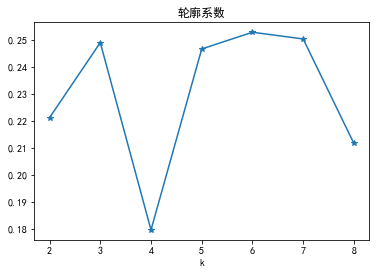

In [90]:
#肘部法
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import numpy as np
inertia=[]
si1_score=[]
for k in range(2,9) :
    kmeans=KMeans(n_clusters=k, random_state=0).fit(x)
    inertia.append(np.sqrt(kmeans.inertia_))
    si1_score.append(silhouette_score(x,kmeans.labels_))
plt.plot(range(2,9) , si1_score, '*-')
plt.xlabel('k')
plt.title('轮廓系数')
plt.savefig('./excel/result/2/轮廓系数.png')
plt.show()

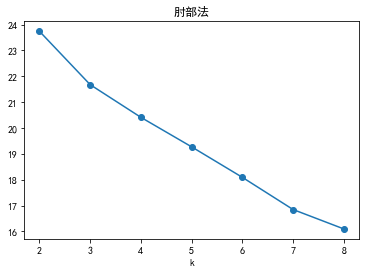

In [91]:
plt.plot(range(2,9) , inertia, 'o-')
plt.xlabel('k')
plt.title('肘部法')
plt.savefig('./excel/result/2/肘部法.png')
plt.show()


In [96]:
model = KMeans(n_clusters=6, max_iter=100, init="k-means++")
model.fit(x)

KMeans(max_iter=100, n_clusters=6)

c:\Miniconda\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\Miniconda\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


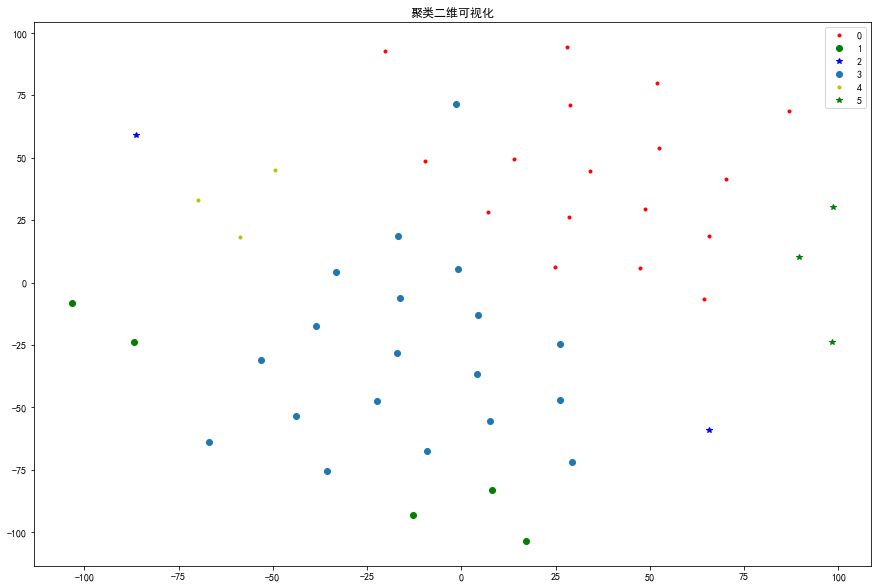

In [99]:
from sklearn.manifold import TSNE


t_sne = TSNE()
t_sne.fit(x)
t_sne = pd.DataFrame(t_sne.embedding_, index=data.index)

r = pd.concat([data, pd.Series(model.labels_, index=data.index)], axis=1)
r.columns = list(data.columns) + ['聚类类别']
r.to_excel('./excel/result/2/k-means_铅钡.xlsx')
plt.figure(figsize=(15,10))

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


dd = t_sne[r[u'聚类类别'] == 0]
plt.plot(dd[0], dd[1], 'r.',label=0)
dd = t_sne[r[u'聚类类别'] == 1]
plt.plot(dd[0], dd[1], 'go',label=1)
dd = t_sne[r[u'聚类类别'] == 2]
plt.plot(dd[0], dd[1], 'b*',label=2)
dd = t_sne[r[u'聚类类别'] == 3]
plt.plot(dd[0], dd[1], 'o',label=3)

dd = t_sne[r[u'聚类类别'] == 4]
plt.plot(dd[0], dd[1], 'y.',label=4)
dd = t_sne[r[u'聚类类别'] == 5]
plt.plot(dd[0], dd[1], 'g*',label=5)
plt.title('聚类二维可视化')
plt.legend()

plt.savefig('./excel/result/2/k-means_铅钡.png')
plt.show()

[[13.  7.]
 [47. 18.]]
[ 9 53]
初始化聚类中心中心后:3861.807397696852


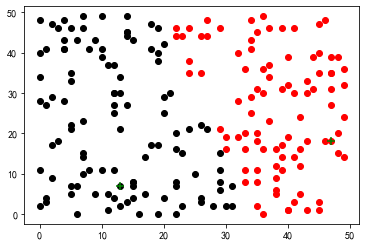

第1次聚类：3112.144829497656
第1次聚类：15.56072414748828


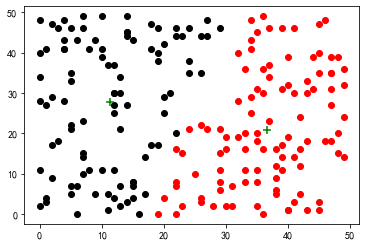

[15.56072414748828]
[[29. 46.]
 [ 4. 43.]
 [ 3. 18.]]
[104  45 175]
初始化聚类中心中心后:3594.2702031689887


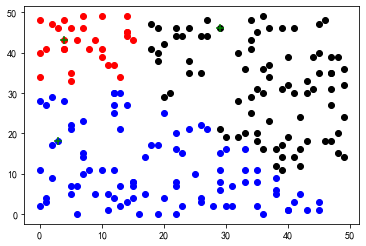

第2次聚类：2323.534262819063
第2次聚类：11.617671314095315


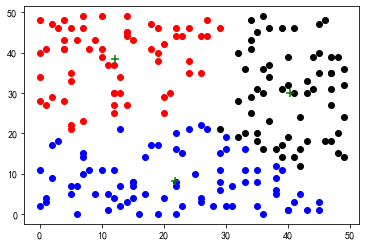

[15.56072414748828, 11.617671314095315]
[[32. 19.]
 [27. 21.]
 [39. 14.]
 [ 8. 41.]]
[181  74  99 169]
初始化聚类中心中心后:2748.9691410807773


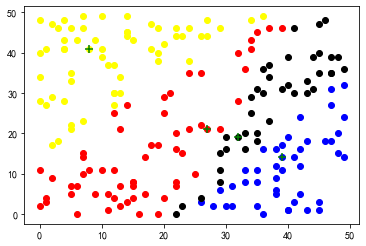

第3次聚类：1828.4133607445124
第3次聚类：9.142066803722562


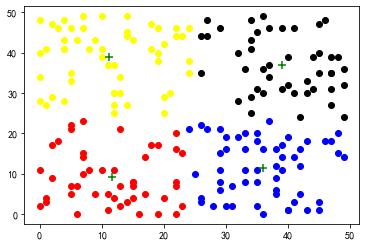

[15.56072414748828, 11.617671314095315, 9.142066803722562]
[[ 5.  7.]
 [23.  2.]
 [37. 23.]
 [19. 38.]
 [22. 46.]]
[107  44  20  96  47]
初始化聚类中心中心后:2109.8447265935083


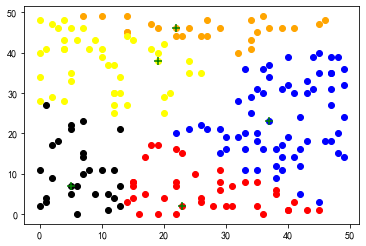

第4次聚类：1702.6843586906843
第4次聚类：8.513421793453421


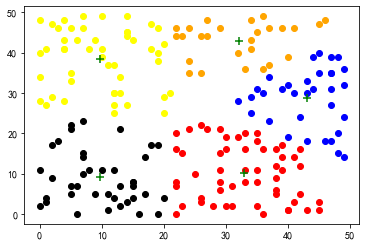

[15.56072414748828, 11.617671314095315, 9.142066803722562, 8.513421793453421]
[[38.  5.]
 [12. 27.]
 [29.  8.]
 [43. 18.]
 [ 5. 33.]
 [10. 11.]]
[ 90  39  49 156  66  55]
初始化聚类中心中心后:2166.25620940945


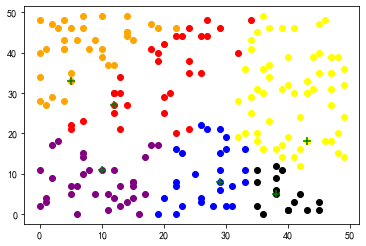

第5次聚类：1565.781543480118
第5次聚类：7.82890771740059


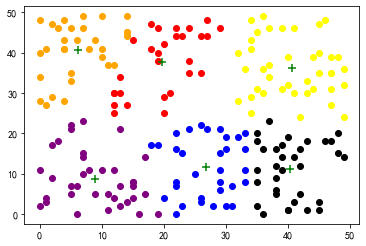

[15.56072414748828, 11.617671314095315, 9.142066803722562, 8.513421793453421, 7.82890771740059]
[[ 2. 29.]
 [49. 36.]
 [ 0.  2.]
 [ 4. 41.]
 [45. 47.]
 [42.  5.]
 [ 9.  5.]]
[ 97 153  85  80  68 141  10]
初始化聚类中心中心后:2010.2626606674162


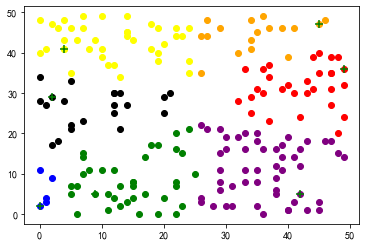

第6次聚类：1432.8508726667096
第6次聚类：7.164254363333548


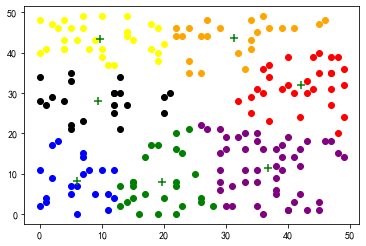

[15.56072414748828, 11.617671314095315, 9.142066803722562, 8.513421793453421, 7.82890771740059, 7.164254363333548]
[[24. 46.]
 [43. 30.]
 [47. 39.]
 [40.  1.]
 [13. 30.]
 [ 4. 28.]
 [17. 14.]
 [ 2. 17.]]
[158  25  98 138 174  71  37   8]
初始化聚类中心中心后:1758.7213210127848


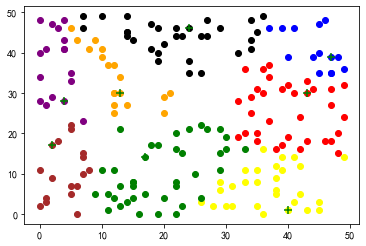

第7次聚类：1306.8760306484874
第7次聚类：6.534380153242437


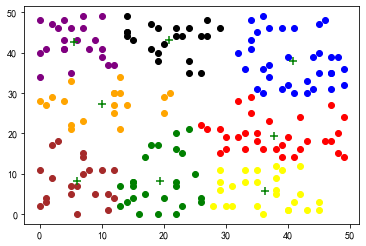

[15.56072414748828, 11.617671314095315, 9.142066803722562, 8.513421793453421, 7.82890771740059, 7.164254363333548, 6.534380153242437]
[[35.  2.]
 [ 6. 43.]
 [ 0. 48.]
 [36. 30.]
 [49. 32.]
 [47. 27.]
 [ 8. 41.]
 [48. 39.]
 [30.  2.]]
[183 163  56 130 155 122 169  17  72]
初始化聚类中心中心后:2190.923743964442


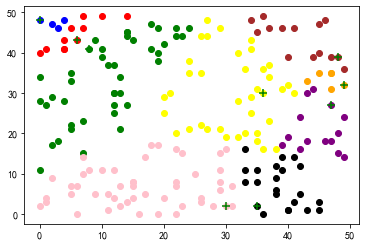

第8次聚类：1202.1823663254356
第8次聚类：6.010911831627178


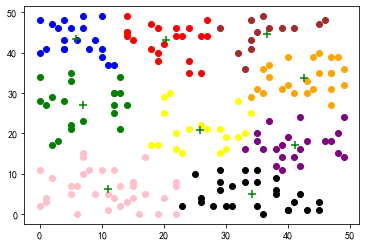

[15.56072414748828, 11.617671314095315, 9.142066803722562, 8.513421793453421, 7.82890771740059, 7.164254363333548, 6.534380153242437, 6.010911831627178]
[[20. 29.]
 [27. 48.]
 [10. 39.]
 [12. 37.]
 [ 0. 40.]
 [39. 14.]
 [44. 39.]
 [39. 14.]
 [37. 23.]
 [20.  4.]]
[ 81 189 136  86  64  99 194  99  20  59]
初始化聚类中心中心后:1597.7900453730967


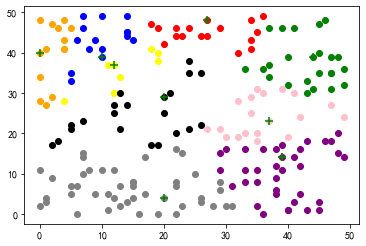

第9次聚类：1308.361164430541
第9次聚类：6.541805822152705


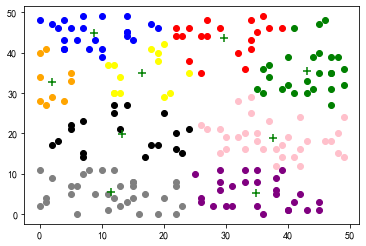

[15.56072414748828, 11.617671314095315, 9.142066803722562, 8.513421793453421, 7.82890771740059, 7.164254363333548, 6.534380153242437, 6.010911831627178, 6.541805822152705]


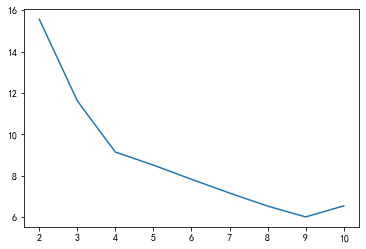

In [15]:
# import matplotlib.pyplot as plt
# import numpy as np


# def distEclud(vecA, vecB):
#     return np.sqrt(sum(np.power(vecA - vecB, 2))) #la.norm(vecA-vecB)


# def get_random_center(datasets,k):
#     center_index = np.random.randint(0,200,k)
#     center = np.zeros((k,2))
#     for j in range(k):
#         center[j] = datasets[center_index[j]]
#     print(center)
#     print(center_index)
#     return center_index,center


# def new_center(datasets,note,k):
#     """
#     更新聚类中心
#     """
#     # 样本数量
#     m = datasets.shape[0]
#     # 新的聚类中心
#     new_center = np.zeros((k,3))

#     for i in range(m):
#         new_center[int(note[i][1])][0] += datasets[i][0]
#         new_center[int(note[i][1])][1] += datasets[i][1]
#         new_center[int(note[i][1])][2] += 1

#     center = np.zeros((k,2))
#     for i in range(k):
#         center[i] = new_center[i,0:2]/new_center[i][2]

#     return center


# def cost_fun(note, k, m):
#     cost_count = np.zeros((k,2))
#     for i in range(m):
#         # note[i][0] # 距离
#         # note[i][1] # =j 所属簇中心j
#         # cost_count[j][0] # j类距离总和
#         # cost_count[j][1]  # j类个数
#         cost_count[int(note[i][1])][0] += note[i][0]  # j类距离按类增加
#         cost_count[int(note[i][1])][1] +=1  # j类个数
#     cost = np.zeros((k,1))
#     for i in range(k):
#         cost[i] = cost_count[i][0]/cost_count[i][1]

#     print(np.sum(cost,axis=1)/cost.shape[0])
#     return cost_count


# def kmean(datasets, k, dis_count):
#     m = datasets.shape[0]
#     note = np.zeros((m,2))
#     center_index,center = get_random_center(datasets,k)
#     for i in range(m):
#         minDist = 100000
#         center_number = 100
#         for j in range(k):
#             dis = distEclud(center[j],datasets[i])
#             if minDist > dis:
#                 minDist = dis
#                 center_number = j
#         note[i][0] = minDist
#         note[i][1] = center_number
#     print("初始化聚类中心中心后:" + str(np.sum(note[:,0])))
#     draw(datasets, note, center,k)

#     centerChanged = True
#     while centerChanged:
#         centerChanged = False
#         center = new_center(datasets, note, k)
#         for i in range(m):
#             minDist = 100000
#             center_number = 100
#             for j in range(k):
#                 dis = distEclud(center[j],datasets[i])
#                 if minDist > dis:
#                     minDist = dis
#                     center_number = j
#             note[i][0] = minDist
#             if note[i][1] != center_number:
#                 centerChanged = True
#                 note[i][1] = center_number
#         # draw(datasets, note, center)     # 每次更新聚类中心与分簇都输出一个图像

#     # cost_fun(note, k, m)
#     dis_count.append(np.sum(note[:, 0])/m)
#     print("第"+str(k-1)+"次聚类："+str(np.sum(note[:, 0])))
#     print("第" + str(k - 1) + "次聚类：" + str(np.sum(note[:, 0])/m))
#     draw(datasets,note,center,k)

#     return note,center_index,dis_count


# def draw(datasets,note,center,k):
#     colors = ['black', 'red', 'blue', 'yellow','orange','purple','green','brown','pink','grey','olive']
#     for i in range(datasets.shape[0]):
#         for j in range(k):
#             if note[i][1] == float(j):
#                 plt.scatter(datasets[i][0], datasets[i][1], color=colors[j])
#     plt.scatter(center[:, 0], center[:, 1], color='green', marker='+',s=60)
#     plt.show()

# if __name__ == "__main__":
#     np.seterr(divide='ignore',invalid='ignore')
#     a = np.random.randint(0,50,size=[200,2])
#     dis_count = []
#     for k in range(2,11):
#         note, center_index,dis_count = kmean(a, k, dis_count)
#         print(dis_count)
#     plt.plot([k for k in range (2,len(dis_count)+2)], dis_count)
#     plt.show()


